<a href="https://colab.research.google.com/github/Kirtanaaa/ML_Classification/blob/main/knnclassificationn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbours (KNN)

K Nearest Neighbors (KNN) is a simple and versatile supervised machine learning algorithm used for both classification and regression tasks.

It is a non-parametric and lazy learning algorithm, meaning it does not make any assumptions about the underlying data distribution and does not create an explicit model during the training phase.

Instead, it stores all the training data and uses it to make predictions on new, unseen data points.

How KNN Works:

1. Training Phase:

- During the training phase, KNN memorizes the entire training dataset, which consists of input features (attributes) and their corresponding labels (class for classification or target value for regression).

- KNN doesn't perform any explicit learning or parameter estimation during training because it doesn't build a model.

2. Prediction Phase:

- When a new data point (query point) is provided for prediction, KNN finds the K-nearest neighbors to the query point from the training dataset based on some distance metric (usually Euclidean distance).

- The value of K is a hyperparameter that needs to be specified before using the algorithm. It determines the number of neighbors to consider for making predictions.

- For classification: KNN takes a majority vote among the K-nearest neighbors' labels and assigns the class with the highest vote as the predicted class for the query point.

- For regression: KNN takes the average of the K-nearest neighbors' target values and assigns this average as the predicted target value for the query point.

Key Considerations:

1. Choice of K: The value of K should be carefully chosen based on the nature of the problem and the dataset. Smaller values of K might lead to noisy predictions, while larger values may oversmooth the decision boundaries.

2. Distance Metric: The choice of distance metric can significantly impact KNN's performance. Euclidean distance is commonly used, but other metrics like Manhattan distance or cosine similarity may be more appropriate depending on the data.

3. Data Scaling: Since KNN relies on distance measures, it's crucial to scale the features if they are on different scales to avoid undue influence from features with larger magnitudes.

Advantages of KNN:

- Simple to understand and implement.

- Can be used for both classification and regression tasks.

- Can handle multi-class classification problems effectively.
Robust to noisy training data and outliers.
- Non-parametric nature makes it suitable for nonlinear relationships in the data.

Limitations of KNN:

- Computationally expensive for large datasets, as it requires comparing the query point with all training data points for each prediction.

- Sensitive to the choice of K and distance metric.

- Performs poorly in high-dimensional feature spaces (curse of dimensionality).

- Requires sufficient training data for accurate predictions.

- Lacks interpretability due to its "black box" nature.

Overall, KNN is a powerful and flexible algorithm suitable for various machine learning tasks, especially when the dataset is small or the underlying relationships are not well-defined by a specific model.

# Algorithm

Step 1: The number of K neighbours are chosen

Step 2: K nearest neighbours of the new data point are taken, according to Euclidean distance

Step 3: Count the number of data points in each category, among these K neighbours

Step 4: The new data point is assigned to the category where the most number of neighbours were found

## Importing libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [28]:
dataset = pd.read_csv('loan.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into Training & Test set

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=21)

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform((x_train))
x_test = sc.fit_transform((x_test))

## KNN Training on Training set

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

## Predicting

In [32]:
print(classifier.predict(sc.transform([[3, 730]])))

[0]


## Predicting Test set results

In [33]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]]


## Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37  3]
 [ 5 23]]


0.8823529411764706

## Visualizing Test Set results

<ipython-input-35-57e06045a383>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


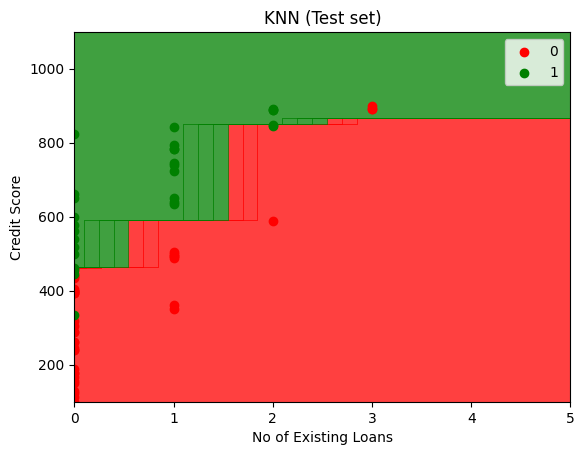

In [35]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 3, step = 1),
                     np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('No of Existing Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()

## Visualising Training set results

<ipython-input-36-ef56be067388>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


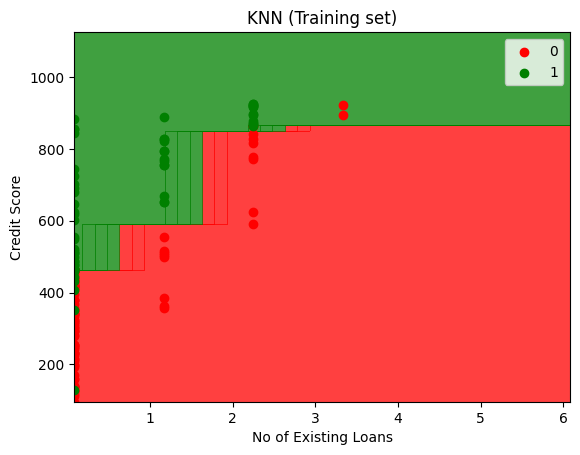

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('No of Existing Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()